Theoretical unconditional mean = 9.999999999999991
Theoretical unconditional var  = 12.56281407035174


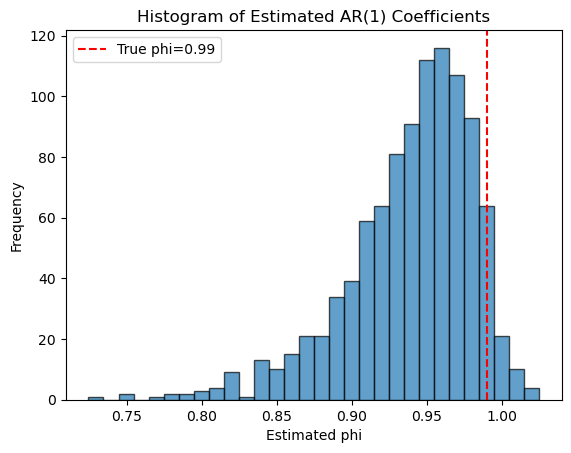

Sample mean of phi estimates: 0.9388
Sample std. dev of phi estimates: 0.0428
True phi = 0.99


In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# -----------------------------
# 1) Theoretical quantities
# -----------------------------
alpha   = 0.1    # Constant term
phi     = 0.99   # AR(1) coefficient
sigma_e = 0.5    # Std. dev. of error

# Unconditional mean mu_Y = alpha / (1 - phi)
muY = alpha / (1 - phi)

# Unconditional variance sigma_Y^2 = sigma_e^2 / (1 - phi^2)
varY = sigma_e**2 / (1 - phi**2)
sdY  = np.sqrt(varY)

print("Theoretical unconditional mean =", muY)
print("Theoretical unconditional var  =", varY)

# -----------------------------
# 2) Simulation setup
# -----------------------------
T = 100     # number of observations in each simulation
M = 1000    # number of simulated realizations

phi_estimates = np.empty(M)

# -----------------------------
# 3) Main simulation loop
# -----------------------------
np.random.seed(1234)  # fix seed for reproducibility (optional)

for i in range(M):
    # (a) Initialize Y array
    Y = np.zeros(T)
    
    # (b) Randomly initialize Y[0] from stationary distribution
    Y[0] = np.random.normal(muY, sdY)
    
    # (c) Generate the AR(1) data
    for t in range(1, T):
        Y[t] = alpha + phi * Y[t-1] + sigma_e * np.random.normal()
    
    # (d) Estimate AR(1) slope using OLS:
    #     Y[t] = c + phi_hat * Y[t-1]
    #     so the regressor is Y[t-1], the dependent var is Y[t].
    #     We skip the first observation or align them properly.
    
    # Build design matrix:
    # Regressor = Y[:-1], Dependent = Y[1:]
    # We add a constant term using sm.add_constant(...)
    X = sm.add_constant(Y[:-1])      # shape will be (T-1, 2)
    y_dep = Y[1:]                    # shape will be (T-1,)
    
    # Fit OLS
    model = sm.OLS(y_dep, X).fit()
    # Coefficients: model.params = [c_hat, phi_hat]
    phi_estimates[i] = model.params[1]

# -----------------------------
# 4) Plot histogram & compare
# -----------------------------
plt.hist(phi_estimates, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(x=phi, color='red', linestyle='--', label='True phi=0.99')
plt.title('Histogram of Estimated AR(1) Coefficients')
plt.xlabel('Estimated phi')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# -----------------------------
# 5) Print summary statistics
# -----------------------------
mean_est = np.mean(phi_estimates)
std_est  = np.std(phi_estimates)

print(f"Sample mean of phi estimates: {mean_est:.4f}")
print(f"Sample std. dev of phi estimates: {std_est:.4f}")
print(f"True phi = {phi}")


Theoretical unconditional mean = 9.999999999999991
Theoretical unconditional var  = 12.56281407035174


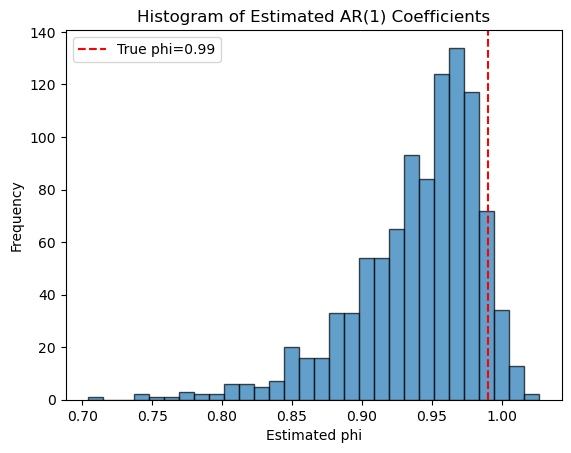

Sample mean of phi estimates: 0.9402
Sample std. dev of phi estimates: 0.0453
True phi = 0.99


In [2]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# -----------------------------
# 1) Theoretical quantities
# -----------------------------
alpha   = 0.1    # Constant term
phi     = 0.99   # AR(1) coefficient
sigma_e = 0.5    # Std. dev. of error

# Unconditional mean mu_Y = alpha / (1 - phi)
muY = alpha / (1 - phi)

# Unconditional variance sigma_Y^2 = sigma_e^2 / (1 - phi^2)
varY = sigma_e**2 / (1 - phi**2)
sdY  = np.sqrt(varY)

print("Theoretical unconditional mean =", muY)
print("Theoretical unconditional var  =", varY)

# -----------------------------
# 2) Simulation setup
# -----------------------------
T = 100     # number of observations in each simulation
M = 1000    # number of simulated realizations

phi_estimates = np.empty(M)

# -----------------------------
# 3) Main simulation loop
# -----------------------------
np.random.seed(6371)  # fix seed for reproducibility (optional)

for i in range(M):
    # (a) Initialize Y array
    Y = np.zeros(T)
    
    # (b) Randomly initialize Y[0] from stationary distribution
    Y[0] = np.random.normal(muY, sdY)
    
    # (c) Generate the AR(1) data
    for t in range(1, T):
        Y[t] = alpha + phi * Y[t-1] + sigma_e * np.random.normal()
    
    # (d) Estimate AR(1) slope using OLS:
    #     Y[t] = c + phi_hat * Y[t-1]
    #     so the regressor is Y[t-1], the dependent var is Y[t].
    #     We skip the first observation or align them properly.
    
    # Build design matrix:
    # Regressor = Y[:-1], Dependent = Y[1:]
    # We add a constant term using sm.add_constant(...)
    X = sm.add_constant(Y[:-1])      # shape will be (T-1, 2)
    y_dep = Y[1:]                    # shape will be (T-1,)
    
    # Fit OLS
    model = sm.OLS(y_dep, X).fit()
    # Coefficients: model.params = [c_hat, phi_hat]
    phi_estimates[i] = model.params[1]

# -----------------------------
# 4) Plot histogram & compare
# -----------------------------
plt.hist(phi_estimates, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(x=phi, color='red', linestyle='--', label='True phi=0.99')
plt.title('Histogram of Estimated AR(1) Coefficients')
plt.xlabel('Estimated phi')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# -----------------------------
# 5) Print summary statistics
# -----------------------------
mean_est = np.mean(phi_estimates)
std_est  = np.std(phi_estimates)

print(f"Sample mean of phi estimates: {mean_est:.4f}")
print(f"Sample std. dev of phi estimates: {std_est:.4f}")
print(f"True phi = {phi}")


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def impulse_response_ar2(phi1, phi2, horizons=20):
    """
    Compute the impulse-response function (IRF) for an AR(2) model
        y_t = phi1*y_{t-1} + phi2*y_{t-2} + e_t
    under a unit shock to e_t at time 0.

    Parameters
    ----------
    phi1 : float
        AR coefficient on y_{t-1}
    phi2 : float
        AR coefficient on y_{t-2}
    horizons : int
        Number of time steps to compute IRF

    Returns
    -------
    irf : np.ndarray of shape (horizons,)
        Impulse response of y over the specified horizon
    """

    # Companion form for AR(2):
    # X_t = [ y_t     ]       [ phi1   phi2 ] [ y_{t-1} ]
    #       [ y_{t-1} ]  =  F = [  1      0   ] [ y_{t-2} ]
    #
    # The shock vector (for e_t) enters only in the first equation:
    # y_t = phi1*y_{t-1} + phi2*y_{t-2} + e_t
    # so B = [1, 0]ᵀ in the companion form.

    F = np.array([[phi1, phi2],
                  [   1.,  0. ]])
    B = np.array([1., 0.])   # shock vector

    irf = np.zeros(horizons)

    # At time 0 (impact period), the effect on y_t is 1
    # (a unit shock in e_t).
    state = B.copy()         # effectively F^0 * B = I*B
    irf[0] = state[0]

    # For subsequent periods, multiply by F repeatedly
    for t in range(1, horizons):
        state = F @ state
        irf[t] = state[0]

    return irf

if __name__ == "__main__":

    # Given AR(2) model: y_t = 0.5 + 1.3 y_{t-1} - 0.45 y_{t-2} + e_t
    # The '0.5' is just the constant term (doesn't affect the IRF shape),
    # so for IRF purposes we only need phi1=1.3 and phi2=-0.45.
    phi1 = 1.3
    phi2 = -0.45

    # Compute IRF for, say, 20 periods
    horizons = 20
    irf_values = impulse_response_ar2(phi1, phi2, horizons)

    # Print or plot IRF
    print("Impulse Response Function:")
    for i, val in enumerate(irf_values, start=1):
        print(f"  Period {i}: {val:.4f}")

    # Quick plot
    plt.figure(figsize=(8,4))
    plt.stem(range(horizons), irf_values, use_line_collection=True)
    plt.xlabel("Time Period")
    plt.ylabel("Response of y")
    plt.title("Impulse Response Function (AR(2) model)")
    plt.grid(True)
    plt.show()


Impulse Response Function:
  Period 1: 1.0000
  Period 2: 1.3000
  Period 3: 1.2400
  Period 4: 1.0270
  Period 5: 0.7771
  Period 6: 0.5481
  Period 7: 0.3628
  Period 8: 0.2250
  Period 9: 0.1293
  Period 10: 0.0668
  Period 11: 0.0286
  Period 12: 0.0072
  Period 13: -0.0035
  Period 14: -0.0078
  Period 15: -0.0086
  Period 16: -0.0077
  Period 17: -0.0061
  Period 18: -0.0045
  Period 19: -0.0031
  Period 20: -0.0020


TypeError: stem() got an unexpected keyword argument 'use_line_collection'

<Figure size 800x400 with 0 Axes>

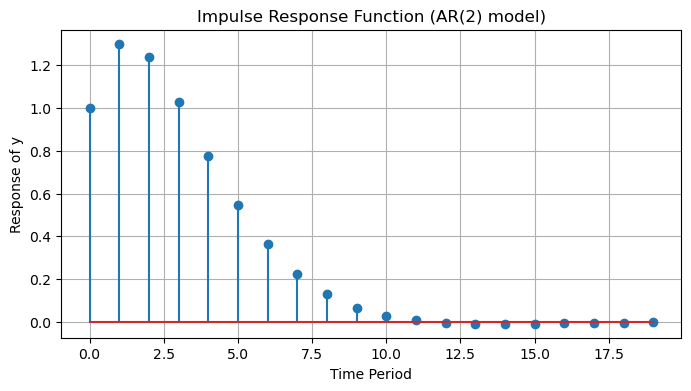

In [4]:
# Quick plot
plt.figure(figsize=(8, 4))
plt.stem(range(horizons), irf_values)
plt.xlabel("Time Period")
plt.ylabel("Response of y")
plt.title("Impulse Response Function (AR(2) model)")
plt.grid(True)
plt.show()
